In [4]:
!pip install seaborn pickle

Defaulting to user installation because normal site-packages is not writeable


ERROR: Could not find a version that satisfies the requirement pickle (from versions: none)
ERROR: No matching distribution found for pickle


In [7]:
# # !IMPORTANT - to run this notebook download first Houses.csv dataset from https://www.kaggle.com/datasets/dawidcegielski/house-prices-in-poland and put it in same folder as for this notebook
# import libraries
from sklearn.model_selection import train_test_split
from sklearn import model_selection, preprocessing, linear_model, naive_bayes, metrics
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pickle

# import csv into pandas DataFrame
stocks = pd.read_csv('TSLA.csv')
stocks = stocks.sample(frac = 1)
stocks.head(50)

,Date,Open,High,Low,Close,Adj Close,Volume
273,2011-07-28,1.840000,1.903333,1.836000,1.878000,1.878000,14080500
1628,2016-12-14,13.249333,13.533333,13.117333,13.246000,13.246000,62263500
619,2012-12-12,2.347333,2.386667,2.330000,2.350667,2.350667,30957000
2062,2018-09-06,18.986668,19.411333,18.591999,18.730000,18.730000,112212000
172,2011-03-04,1.632000,1.666000,1.585333,1.663333,1.663333,23701500
265,2011-07-18,1.822667,1.830000,1.775333,1.815333,1.815333,12778500
31,2010-08-12,1.186667,1.193333,1.159333,1.173333,1.173333,10365000
1260,2015-07-01,18.073999,18.174667,17.856667,17.943333,17.943333,31518000
3252,2023-05-31,199.779999,203.949997,195.119995,203.929993,203.929993,150711700
2477,2020-05-01,50.333332,51.518002,45.535999,46.754665,46.754665,487977000


In [8]:
print(stocks.describe())
print(stocks.info())
print(stocks.isnull().values.any())

              Open         High          Low        Close    Adj Close  \
count  3383.000000  3383.000000  3383.000000  3383.000000  3383.000000   
mean     69.595920    71.139907    67.934383    69.578123    69.578123   
std     101.016818   103.287828    98.520375   100.941653   100.941653   
min       1.076000     1.108667     0.998667     1.053333     1.053333   
25%      10.422334    10.824666    10.210000    10.544000    10.544000   
50%      16.866667    17.132668    16.625999    16.879333    16.879333   
75%      99.818333   102.410663    97.599998    99.872333    99.872333   
max     411.470001   414.496674   405.666656   409.970001   409.970001   

             Volume  
count  3.383000e+03  
mean   9.672717e+07  
std    8.022900e+07  
min    1.777500e+06  
25%    4.574925e+07  
50%    8.098950e+07  
75%    1.234176e+08  
max    9.140820e+08  
<class 'pandas.core.frame.DataFrame'>
Int64Index: 3383 entries, 273 to 3362
Data columns (total 7 columns):
 #   Column     Non-Null Co

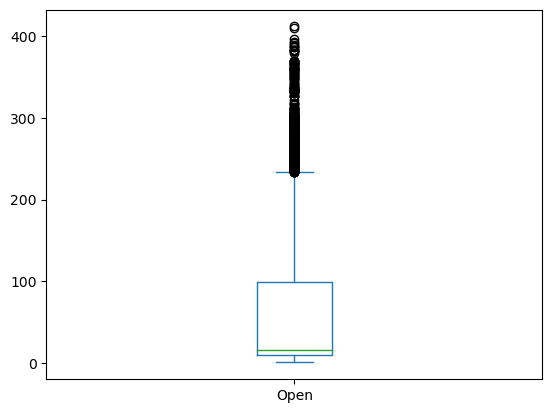

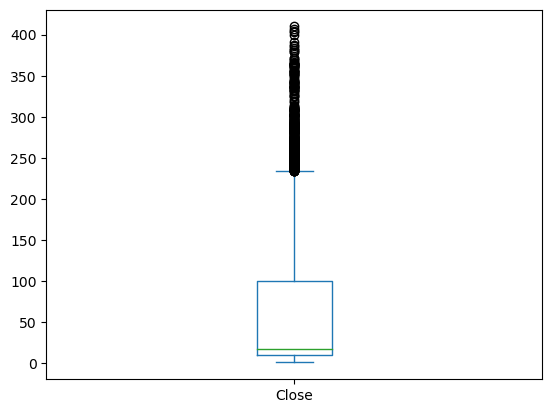

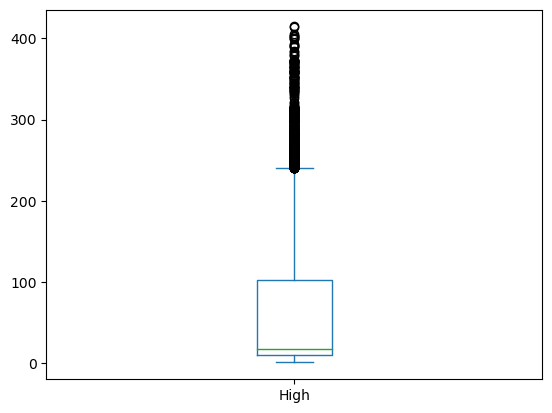

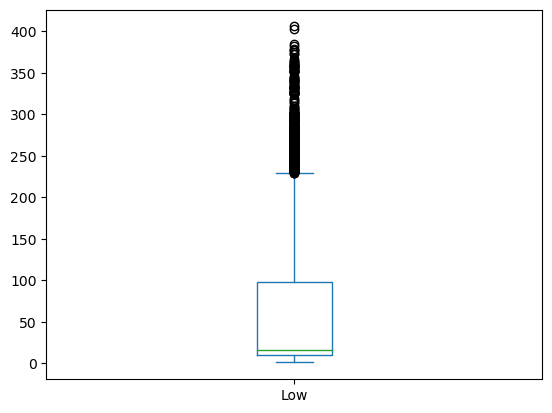

In [15]:
stocks["Open"].plot(kind="box")
plt.show()
stocks["Close"].plot(kind="box")
plt.show()
stocks["High"].plot(kind="box")
plt.show()
stocks["Low"].plot(kind="box")
plt.show()

C:\Users\orwat\AppData\Local\Temp\ipykernel_19272\1418381014.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlations = stocks.corr()


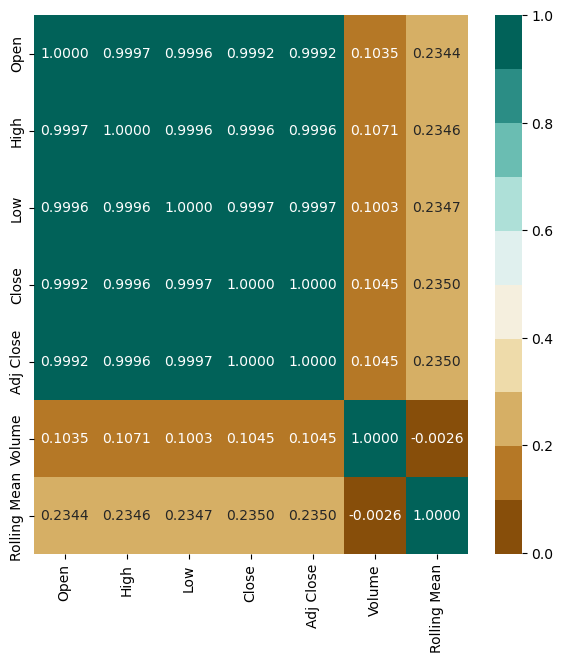

In [22]:
correlations = stocks.corr()
fig, ax = plt.subplots(figsize=(7,7))
colormap = sns.color_palette("BrBG", 10)

sns.heatmap(correlations, 
    cmap=colormap, 
    annot=True, 
    fmt=".4f")

plt.show()